In [3]:
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";

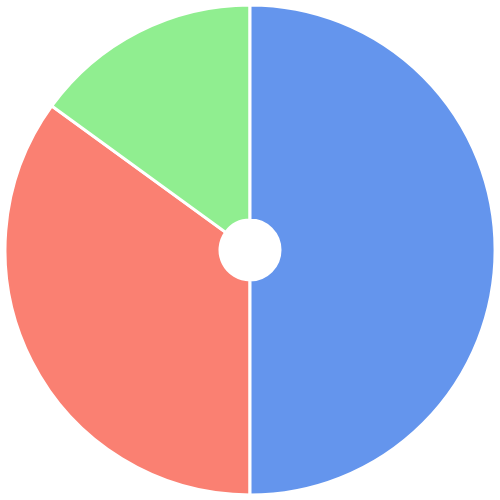

In [4]:
import * as d3 from "npm:d3"
import { createCanvas, Image, Path2D } from "https://deno.land/x/skia_canvas/mod.ts";

const pieCanvas = createCanvas(500, 500);
const pieCTX = pieCanvas.getContext("2d");
const arcDraw = d3.arc()

pieCTX.strokeStyle = "white";
pieCTX.lineWidth = 3;
pieCTX.translate(250,250)

const data = [{ value: 0.35, label: "People who love pie charts", color: "salmon" },
              { value: 0.15, label: "People who hate pie charts", color: "lightgreen" }, 
              { value: 0.5, label: "Sane people", color: "cornflowerblue" }];
const pie = d3.pie().value((d) => d.value);
const arcs = pie(data);

arcs.forEach(arc => {
    // Outer radius will be slightly less than the width of the display so we don't cut anything off
    const drawingInstructions = arcDraw({ innerRadius: 30, outerRadius: 245, ...arc})
    let p = new Path2D(drawingInstructions);
    pieCTX.fillStyle = arc.data.color;
    pieCTX.fill(p);
    pieCTX.stroke(p);
})

display(pieCanvas);